# Dataset Overview with Augmentations

This notebook provides an overview of the Imatch dataset and demonstrates image augmentations used for training.


## Setup

Import necessary libraries and initialize the dataset:


In [3]:
import matplotlib.pyplot as plt
from dataset.dataset import ImageDataset
from dataset.polygon_dataset import PolygonImageDataset
from dataset.utils import get_train_transforms

## Simple dataset

The dataset that contains only image data



In [4]:
dataset = ImageDataset(root_dir="dataset/data/base_dataset")
print(f"Dataset initialized with {len(dataset)} images")

Dataset initialized with 40 images


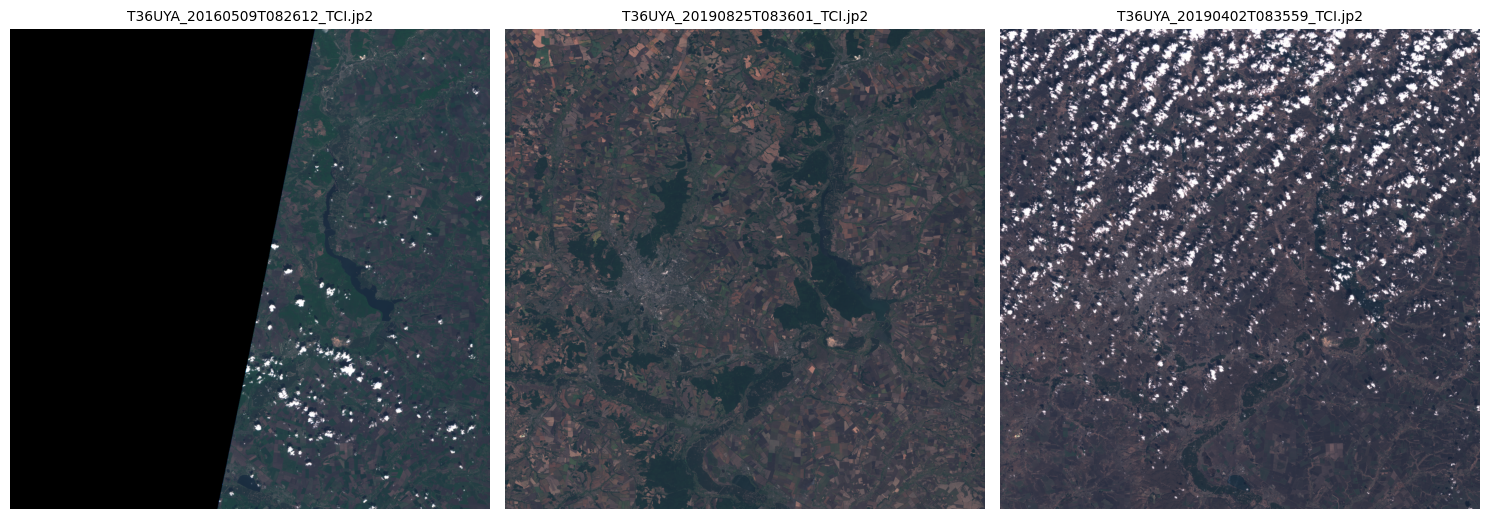

In [5]:
num_samples = min(3, len(dataset))
num_columns = 1 if num_samples <= 3 else num_samples // 3 + 1
fig, axes = plt.subplots(num_columns, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_samples):
    sample = dataset[i]
    axes[i].imshow(sample['image_np'])
    axes[i].set_title(f"{sample['filename']}", fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Augmentations

Apply training augmentations to the same image twice to create pair:


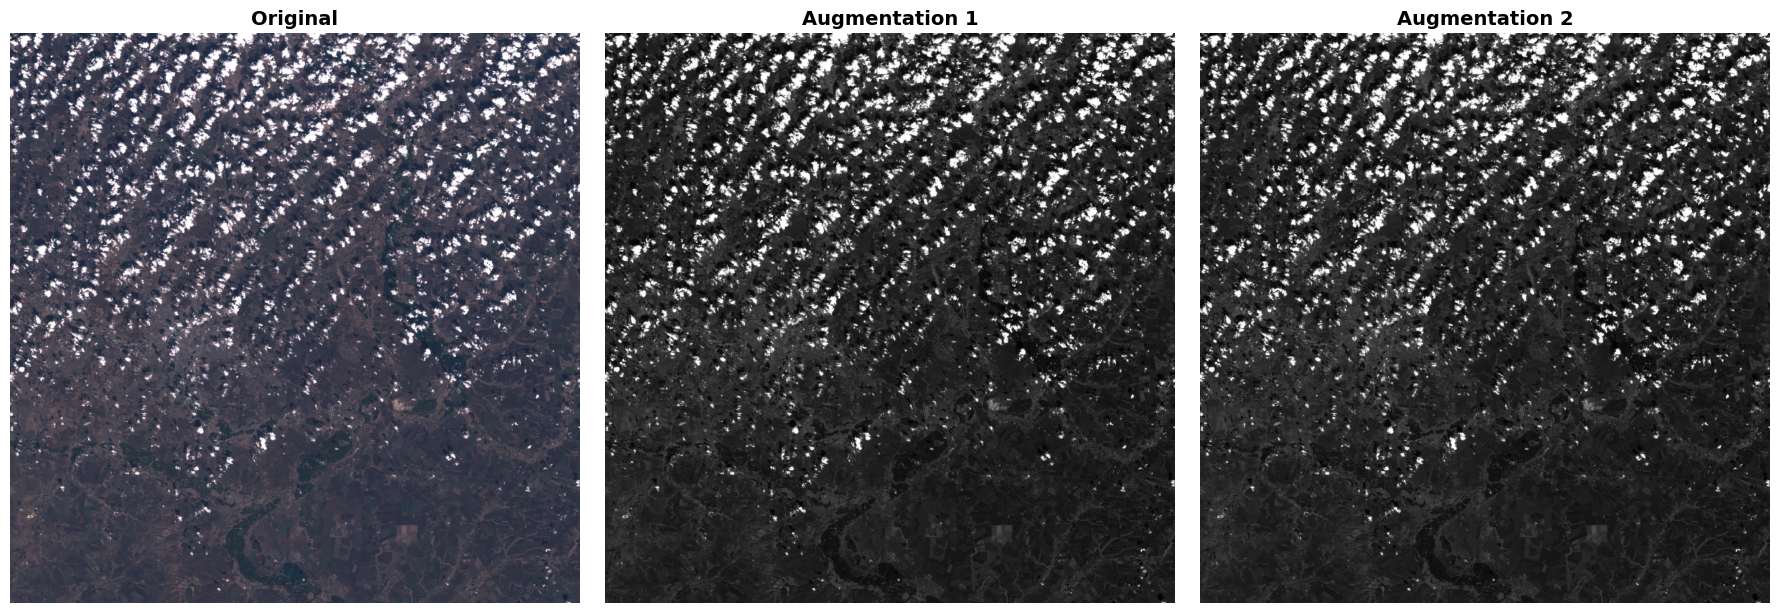

In [6]:
sample = dataset[2]

aug1 = get_train_transforms()(image=sample['image_np'])['image']
aug2 = get_train_transforms()(image=sample['image_np'])['image']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(sample['image_np'])
axes[0].set_title("Original", fontsize=14, fontweight='bold')
axes[0].axis('off')

aug1_np = aug1.squeeze().cpu().numpy()
axes[1].imshow(aug1_np, cmap='gray')
axes[1].set_title("Augmentation 1", fontsize=14, fontweight='bold')
axes[1].axis('off')

aug2_np = aug2.squeeze().cpu().numpy()
axes[2].imshow(aug2_np, cmap='gray')
axes[2].set_title("Augmentation 2", fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Polygon Dataset

The PolygonImageDataset loads images with geojson polygon annotations


In [7]:
from dataset.utils import get_val_transforms_with_resize

polygon_dataset = PolygonImageDataset(
        root_dir="dataset/data/base_dataset",
        geojson_file="dataset/data/base_dataset/deforestation_labels.geojson",
        target_size=(512, 512),
        mode='train',
        max_keypoints=512,
        transform=get_val_transforms_with_resize((512, 512))
    )

Loading polygons from dataset/data/base_dataset/deforestation_labels.geojson
Total images in directory: 50
Images with polygons: 46
Images without polygons: 0
Final dataset size (images with polygons): 46


Visualize a sample image with its polygon keypoints:


Sample 3:
Filename: T36UXA_20180810T083601_TCI.jp2


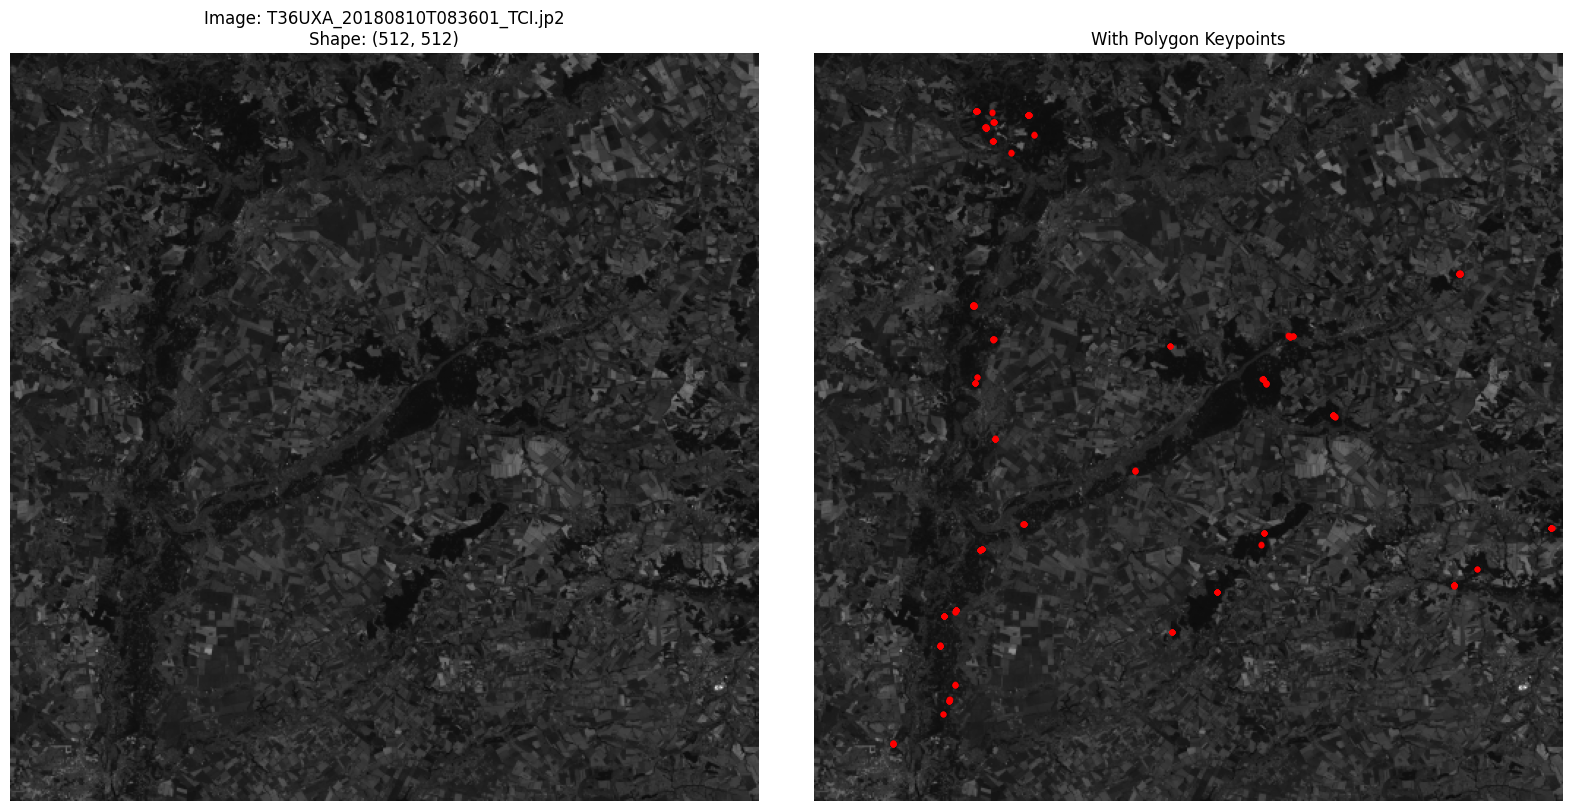

In [8]:
sample_idx = 3
sample = polygon_dataset[sample_idx]

print(f"Sample {sample_idx}:")
print(f"Filename: {sample['filename']}")

if sample['has_polygons'] and sample['keypoints'] is not None:
    polygon_dataset.draw(sample_idx, figsize=(16, 8))
